In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and pre-processing

In [3]:
# Load the diabetes dataset

file_path = 'C:/Users/ruzar/Downloads/diabetes.csv'  
diabetes_data = pd.read_csv(file_path)



In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Count how many zero values are present in each column of the dataset
missing_values_all_columns = (diabetes_data == 0).sum()

# Display the count of zero values for each column
print(missing_values_all_columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [14]:
# Columns where zero represents missing data
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing the missing values with median
for column in columns_with_zeros:
    median_value = diabetes_data[column].median()
    diabetes_data[column] = diabetes_data[column].replace(0, median_value)



In [16]:
# Re-checking the null values
print((diabetes_data[columns_with_zeros] == 0).sum())  

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


# Data Splitting and Feature Scaling

In [19]:

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Checking scaled features
print(X_train_scaled[:5])  

[[-0.52639686 -1.25688146 -0.01899526 -0.45487119 -0.61269674 -0.05024677
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.32605067  0.8081742  -0.34092141 -0.61269674 -0.59858988
   2.41502991  1.48710085]
 [-0.82846011  0.57153617 -2.16963585 -0.91067031 -0.12042886 -0.52643947
   0.54916055 -0.94893896]
 [-1.13052335  1.30290323 -1.83876807 -0.45487119 -0.61269674 -1.50768503
  -0.63929127  2.79212217]
 [ 0.68185612  0.40531639  0.64274031  1.14042573  2.57063552  1.99882486
  -0.68682934  1.13909516]]


# Baseline perceptron model

In [24]:
# Build the Perceptron model
perceptron_model = Perceptron(random_state=42)

# Train the model using the training data
perceptron_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = perceptron_model.predict(X_test_scaled)


## Model Evaluation

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 64.29%
Confusion Matrix:
 [[82 17]
 [38 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        99
           1       0.50      0.31      0.38        55

    accuracy                           0.64       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.62      0.64      0.62       154



## Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model using the training data
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_lr = logistic_regression_model.predict(X_test_scaled)



In [32]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

# Output the results
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)

Logistic Regression Accuracy: 76.62%
Confusion Matrix:
 [[82 17]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



## Support Vector Machine (SVM) Model

In [35]:
from sklearn.svm import SVC

# Build the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model using the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_scaled)



In [37]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Output the results
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)

SVM Accuracy: 75.32%
Confusion Matrix:
 [[84 15]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## Random forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test_scaled)



In [41]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Output the results
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Accuracy: 76.62%
Confusion Matrix:
 [[80 19]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Tuning the Random forest model using gridsearch

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to bootstrap samples
}

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best parameters
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
# Use the best parameters to make predictions
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

# Output the results
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_rf_tuned)
print("Classification Report:\n", class_report_rf_tuned)

Tuned Random Forest Accuracy: 76.62%
Confusion Matrix:
 [[80 19]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



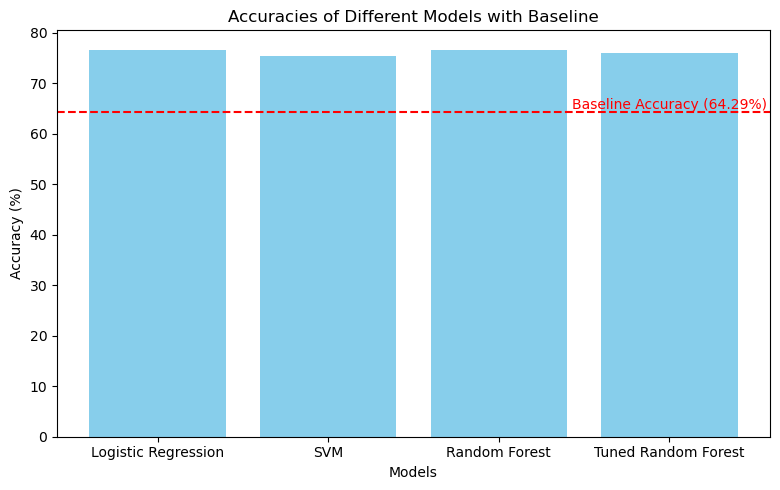

In [47]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Tuned Random Forest']
accuracies = [76.62, 75.32, 76.62, 75.97]
baseline_accuracy = 64.29  # Baseline model accuracy (Perceptron)

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')

# Add the baseline accuracy as a red horizontal dotted line
plt.axhline(y=baseline_accuracy, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracies of Different Models with Baseline')

# Add the baseline label outside the plot
plt.text(len(models) - 1, baseline_accuracy + 0.5, f'Baseline Accuracy ({baseline_accuracy}%)', 
         color='red', ha='center')

# Show the plot
plt.tight_layout()
plt.show()